<a href="https://colab.research.google.com/github/JacksonGodbersen/ME592/blob/main/592HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ME 592 Homework 1
Jackson Godbersen

# Part 1

In [48]:
import torchvision
import torch
from torchvision import datasets, transforms
from torch.utils.data import Subset, DataLoader
from torchvision.transforms import v2

In [49]:
mnist_dataset = torchvision.datasets.MNIST('/files/', download=True)

images, labels = mnist_dataset.data, mnist_dataset.targets

subset = images[:1000]

subset_labels = labels[:1000]

combined_subset = [images, labels][:1000]

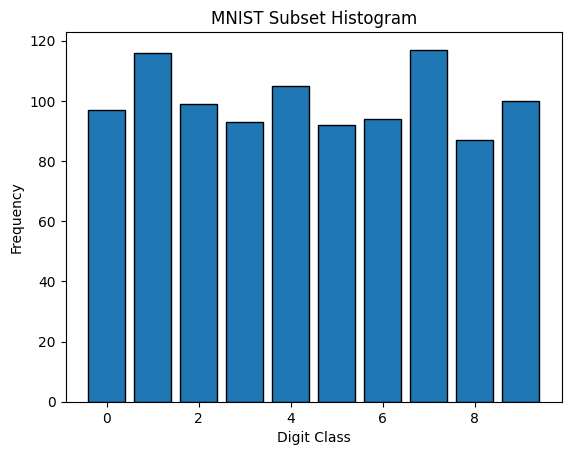

In [50]:
import matplotlib.pyplot as plt
plt.hist(subset_labels, bins=range(11), align='left', rwidth=0.8, edgecolor='black')
plt.xlabel('Digit Class')
plt.ylabel('Frequency')
plt.title('MNIST Subset Histogram')
plt.show()

In [51]:
!pip install einops
from einops import rearrange
pattern = "(batch_size num_batches a) b c -> num_batches batch_size a b c"
a = rearrange(subset, pattern, num_batches=1000//25, batch_size = 25)
print(a.shape)


torch.Size([40, 25, 1, 28, 28])


In [52]:
import random
random_batch = random.randint(0, 40)
random_img = random.randint(0, 25)

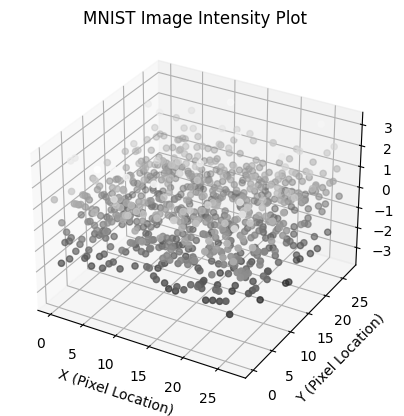

In [53]:
import torch
import matplotlib.pyplot as plt

image_tensor = a[random_batch][random_img]

image_tensor = torch.randn(28, 28)

image_array = image_tensor.numpy()

intensity_values = image_tensor.flatten()

x, y = torch.meshgrid(torch.arange(28), torch.arange(28))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.flatten(), y.flatten(), intensity_values, c=intensity_values, cmap='gray')
ax.set_xlabel('X (Pixel Location)')
ax.set_ylabel('Y (Pixel Location)')
ax.set_zlabel('Intensity')
plt.title('MNIST Image Intensity Plot')
plt.show()


# Part 2


In [90]:
import pandas as pd
df = pd.read_csv("/energydata_complete.csv")

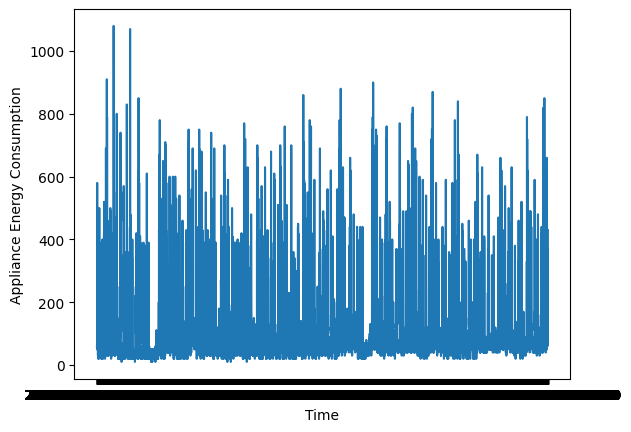

In [55]:
import matplotlib.pyplot as plt
plt.xlabel('Time')
plt.ylabel('Appliance Energy Consumption')
plt.plot(df["date"], df["Appliances"])

In [56]:
df['date'] = pd.to_datetime(df['date'])

In [57]:
df["hour"] = df["date"][0:24*7*6].dt.hour
map = df[['hour', 'Appliances']][0:24*7*6]
print(map)

a = df["hour"][0:24*7*6]
b = df["Appliances"][0:24*7*6]
mega_list = []
temp_list = []

      hour  Appliances
0     17.0          60
1     17.0          60
2     17.0          50
3     17.0          50
4     17.0          60
...    ...         ...
1003  16.0          50
1004  16.0          50
1005  16.0          40
1006  16.0          40
1007  16.0          50

[1008 rows x 2 columns]


In [58]:
import numpy as np
DAYS_IN_WEEK = 7
HOURS_IN_DAYS = 24
INTERVALS_IN_HOUR = 6

day_list = []
for i in range(DAYS_IN_WEEK):
  hour_list = []
  for j in range(HOURS_IN_DAYS):
    hour_sum = 0
    for k in range(INTERVALS_IN_HOUR):
      hour_sum += b[k + j * INTERVALS_IN_HOUR + i * DAYS_IN_WEEK]
    hour_list.append(hour_sum)
  day_list.append(hour_list)

day_list = np.array(day_list).T

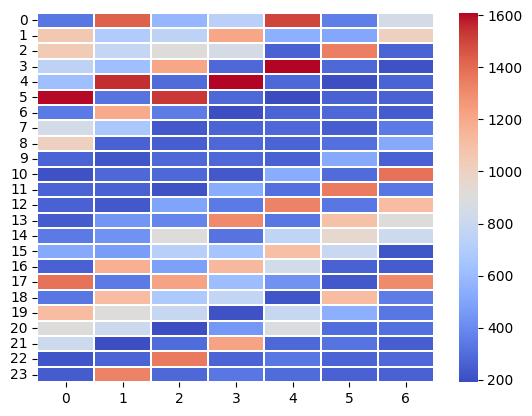

In [59]:
import seaborn as sns
ax = sns.heatmap(day_list, linewidth=.2, cmap='coolwarm')
plt.show()

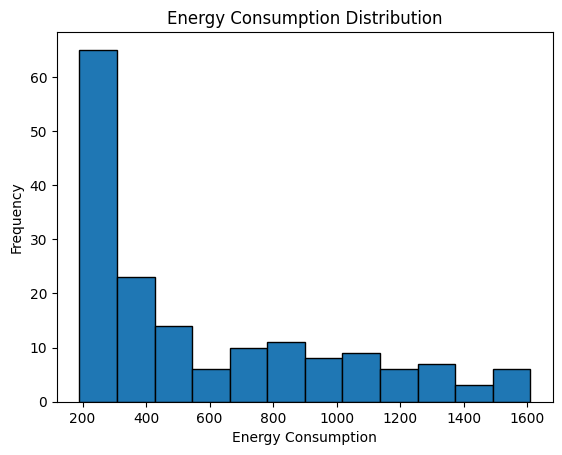

In [67]:
values_flat = np.array(day_list).flatten()

plt.hist(values_flat, bins=12, edgecolor = "black")
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Energy Consumption Distribution')

plt.show()


In [61]:
NSM = (df['date'].dt.hour * 3600 + df['date'].dt.minute * 60 + df['date'].dt.second)[:24*7*6]


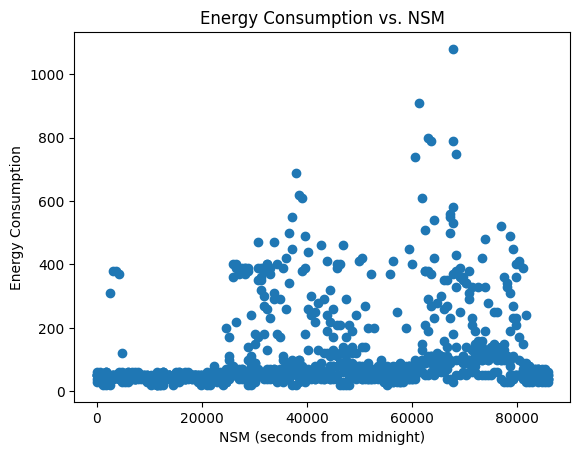

In [93]:
plt.scatter(NSM, df["Appliances"][:1008])
plt.xlabel('NSM (seconds from midnight)')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption vs. NSM')
plt.show()

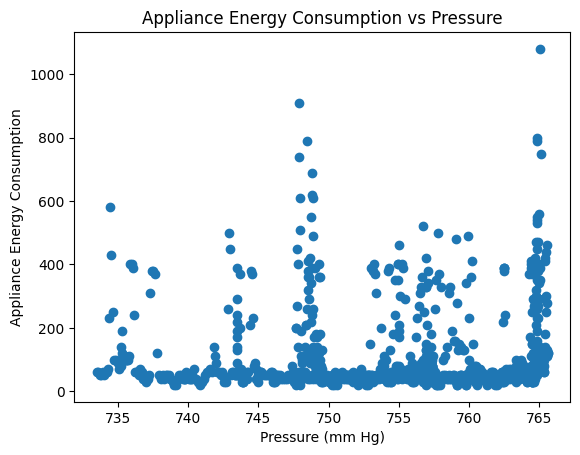

In [62]:
plt.scatter(df["Press_mm_hg"][:1008], df['Appliances'][:1008])
plt.xlabel("Pressure (mm Hg)")
plt.ylabel("Appliance Energy Consumption")
plt.title("Appliance Energy Consumption vs Pressure");

There appears to be distinct pressures that have very high appliance energy consumption. Each peak likely represents a geographical location. The data was collected for a period of 4.5 months which would reduce the regional pressure variation compared to a year long collection period. Households in the same region will exhibit similar applicane energy consumption habits. Given this, I believe its probable that the clusters are formed from household's in the same region sharing similar appliance energy consumption.

Energy consumption varies across the day because of people's daily routines. The first peak is close to noon. Many people go home over their lunch break and appliance energy would increase due to a variety of reasons including lighting and refrigeration. The second peak likely is caused by people consuming energy during cooking and watching tv in the evening. The times when people generally sleep and are at work to a lesser extent have very low energy consumption.

# Part 3


In [63]:
df = pd.read_csv("/airfoil_self_noise.dat", header=None, sep='\t')
df.columns = ['Frequency', 'Angle', 'Chord', 'Velocity', 'Thickness', 'Sound Pressure']

stats = pd.DataFrame({
    "Mean": df.mean(),
    "Variance": df.var(),
    "Standard Deviation": df.std(),
    "Median": df.median(),
    "Kurtosis": df.kurtosis(),
    "Skewness": df.skew(),
    "Range": df.max() - df.min()
})

print("Descriptive statistics for input variables:")
print(stats)

Descriptive statistics for input variables:
                       Mean      Variance  Standard Deviation       Median  \
Frequency       2886.380572  9.938717e+06         3152.573137  1600.000000   
Angle              6.782302  3.502424e+01            5.918128     5.400000   
Chord              0.136548  8.749868e-03            0.093541     0.101600   
Velocity          50.860745  2.425116e+02           15.572784    39.600000   
Thickness          0.011140  1.729287e-04            0.013150     0.004957   
Sound Pressure   124.835943  4.759146e+01            6.898657   125.721000   

                Kurtosis  Skewness         Range  
Frequency       5.708685  2.137084  19800.000000  
Angle          -0.412951  0.689164     22.200000  
Chord          -1.037964  0.457457      0.279400  
Velocity       -1.563951  0.235852     39.600000  
Thickness       2.218903  1.702165      0.058011  
Sound Pressure -0.314187 -0.418952     37.607000  
